In [1]:
import h5py 
import scipy as sp
import re
import pdb
import os

import sys

import scipy as sp
import pylab as pl
from matplotlib import cm
import scipy.stats as st
import h5py
import pdb
import pandas as pd
sp.random.seed(0)
# import LIMIX
import sys
import limix.modules.varianceDecomposition as var
import limix.modules.qtl as qtl
import limix.io.data as data
import limix.io.genotype_reader as gr
import limix.io.phenotype_reader as phr
import limix.io.data_util as data_util
import limix.utils.preprocess as preprocess
# plotting and visualization utilties
from limix.utils.plot import *
# genotype summary stats
from limix.deprecated.stats.geno_summary import *
import os
import cPickle
import sys
import numpy as np
import pandas as pd

# activiate inline plotting
%matplotlib inline


In [2]:
#import data
#the data used in this study have been pre-converted into an hdf5 file. 
#to preprocess your own data, please use limix command line brinary
file_name = os.path.abspath("/Users/brooks/Documents/git/steinmetz-lab/general/S288CxYJM789.hdf5")
geno_reader  = gr.genotype_reader_tables(file_name)
pheno_reader = phr.pheno_reader_tables(file_name)

#the data object allows to query specific genotype or phenotype data
dataset = data.QTLData(geno_reader=geno_reader,pheno_reader=pheno_reader)

In [49]:
#getting genotypes
snps = dataset.getGenotypes() #SNPs
position = dataset.getPos()
position['chrom']
position,chromBounds = data_util.estCumPos(position=position,offset=0)

#phenotype
P_max = dataset.phenotype_ID.shape[0]
phenotype_ID = dataset.phenotype_ID[0:P_max]
phenotype_vals, sample_idx = dataset.getPhenotypes(phenotype_ID)

N = snps.shape[0] #number of individuals
S = snps.shape[1] #number of SNPs
P = phenotype_vals.shape[1]#number of phenotypes


/Users/brooks/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


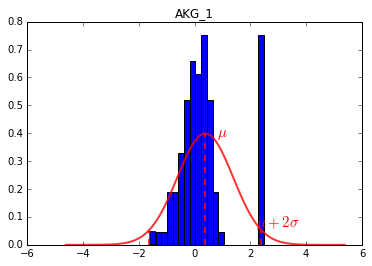

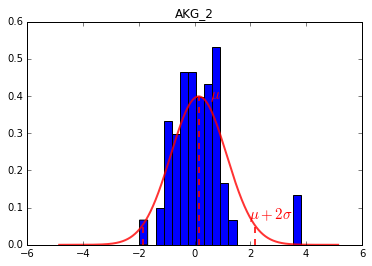

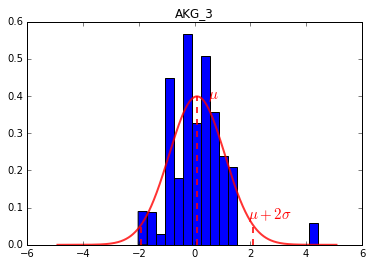

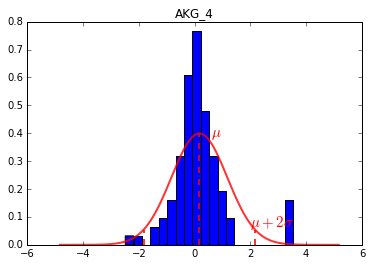

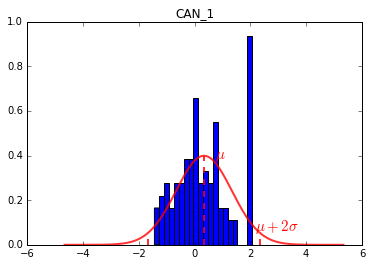

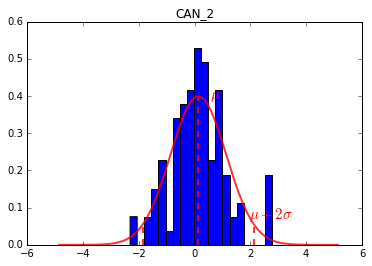

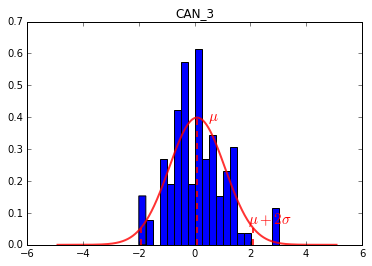

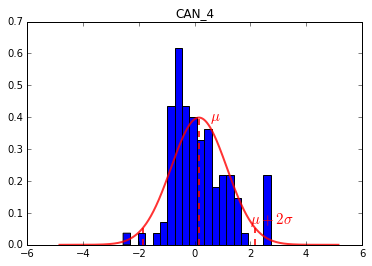

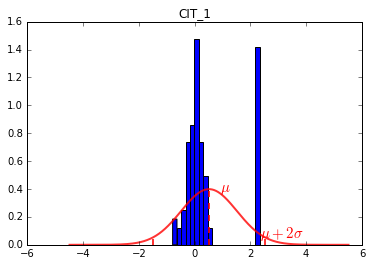

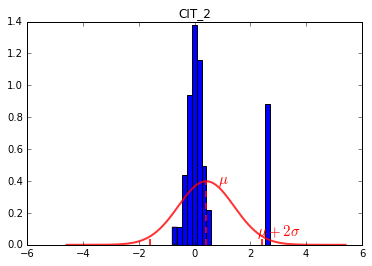

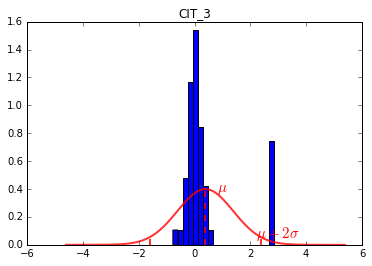

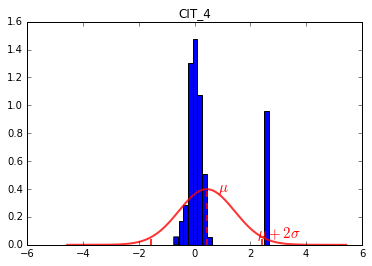

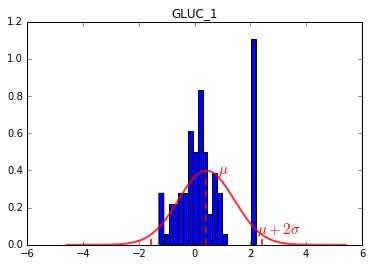

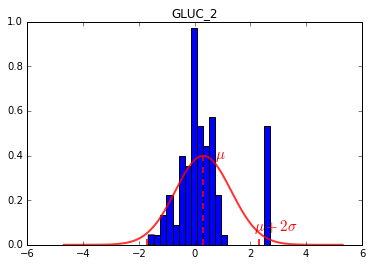

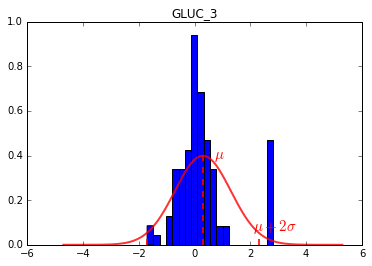

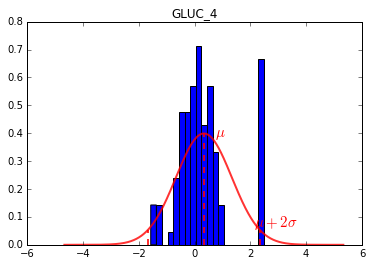

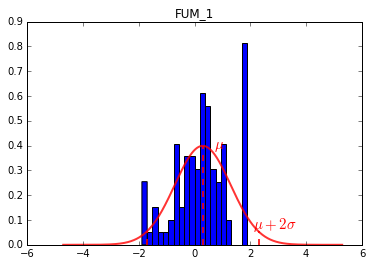

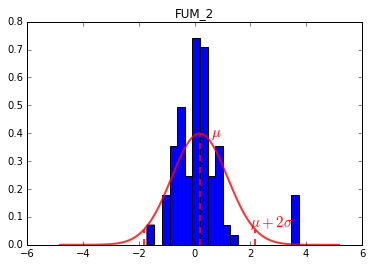

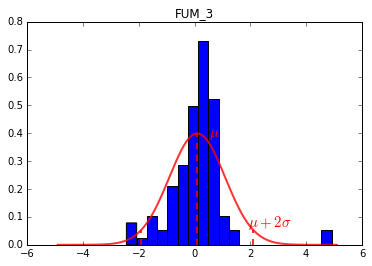

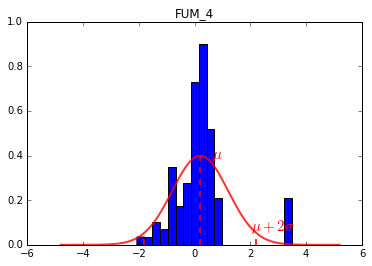

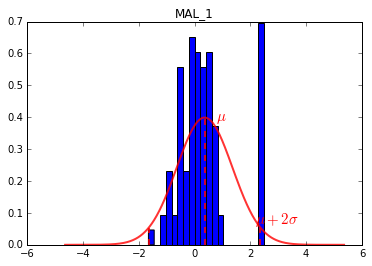

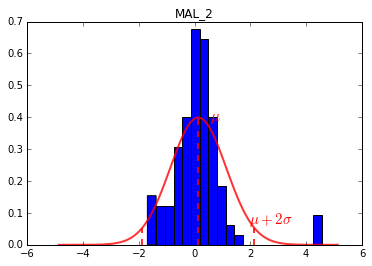

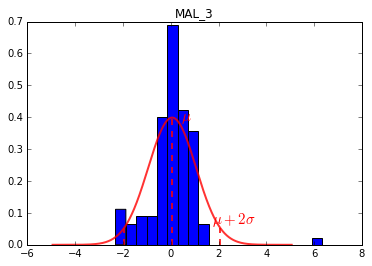

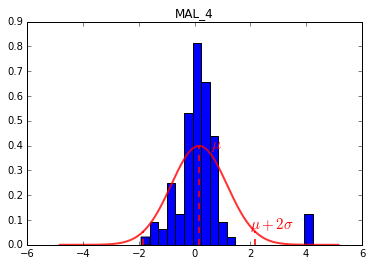

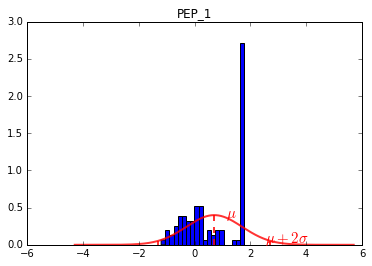

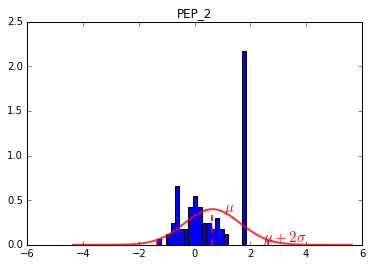

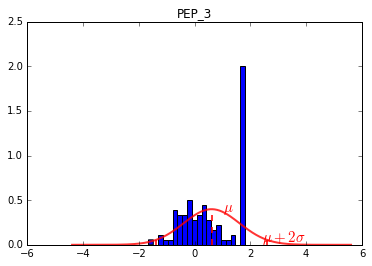

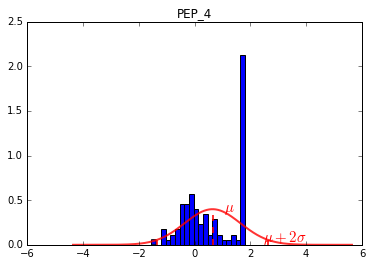

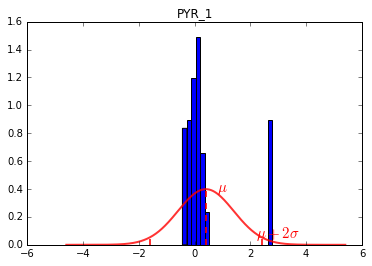

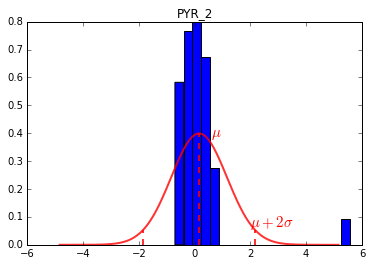

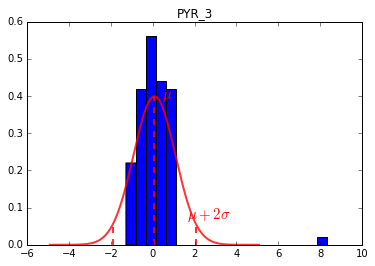

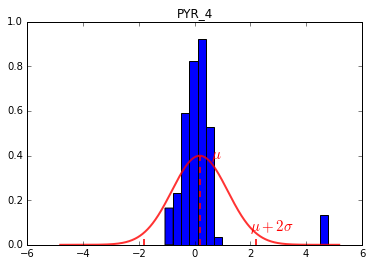

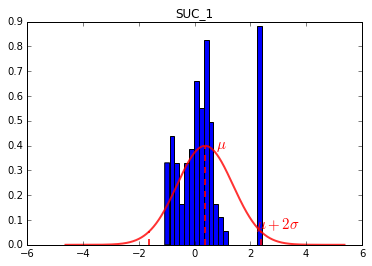

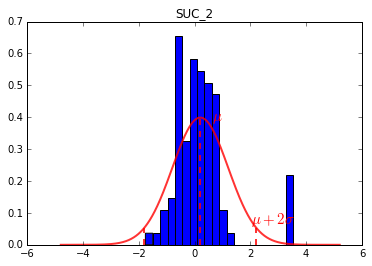

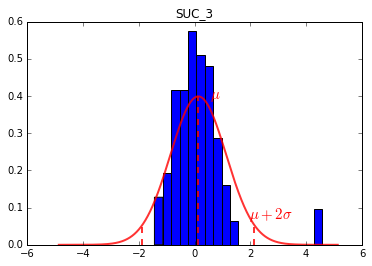

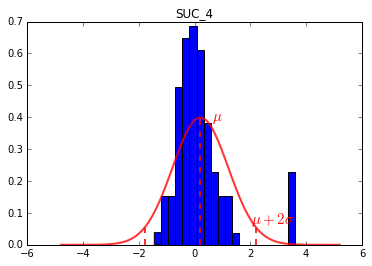

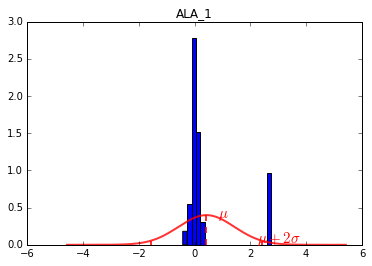

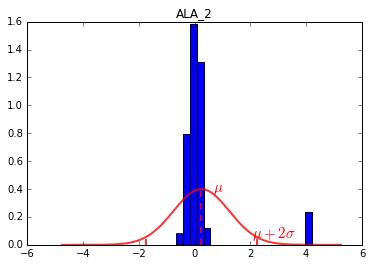

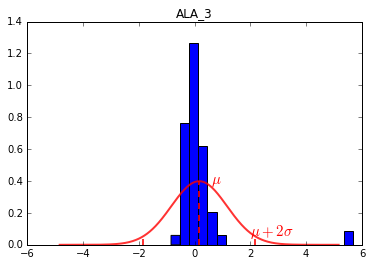

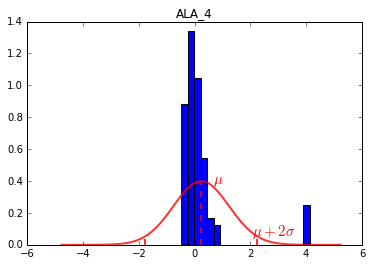

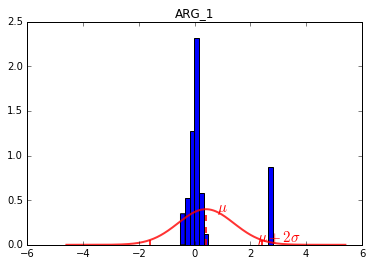

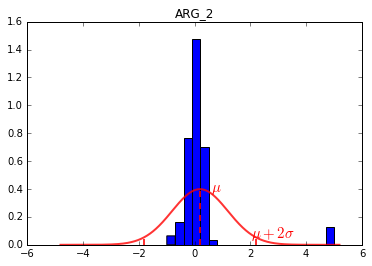

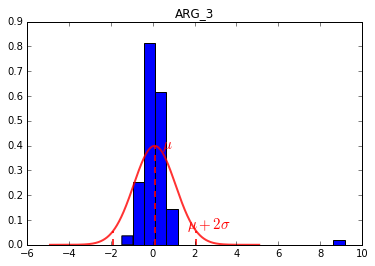

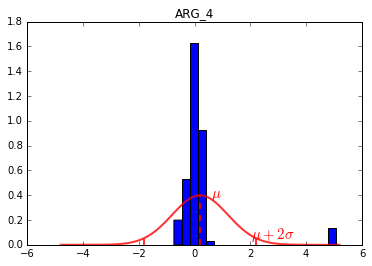

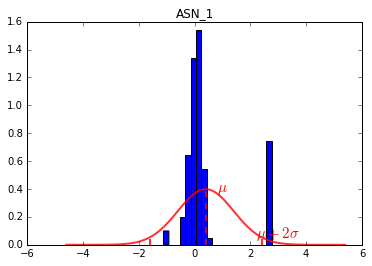

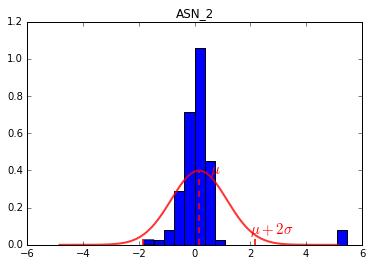

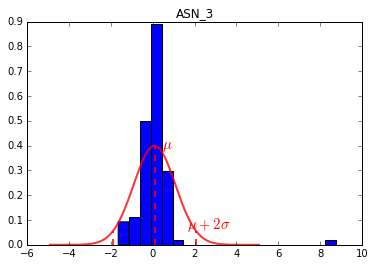

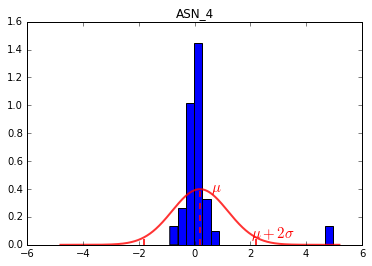

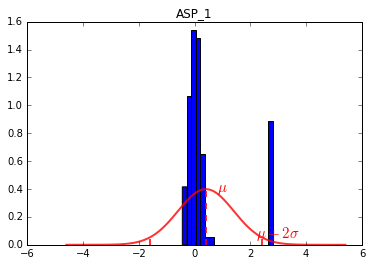

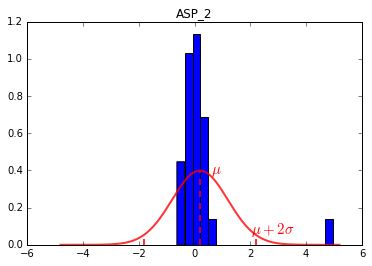

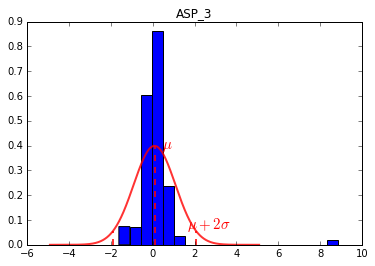

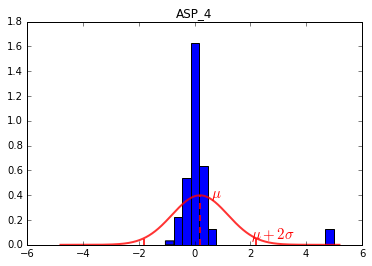

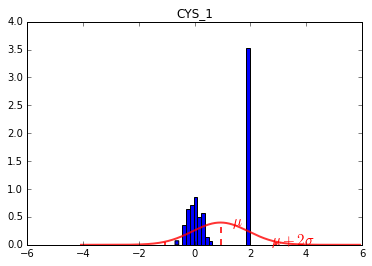

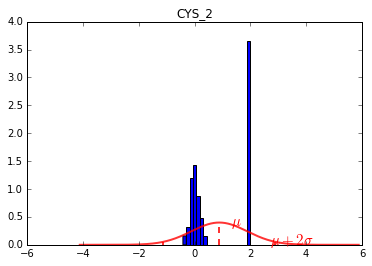

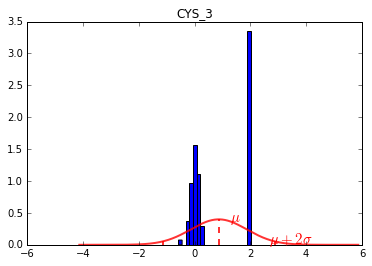

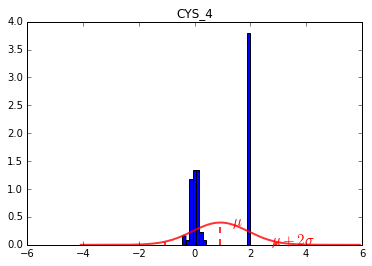

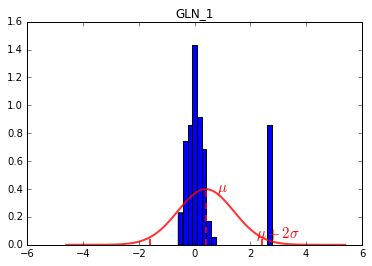

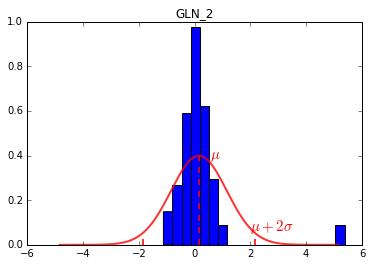

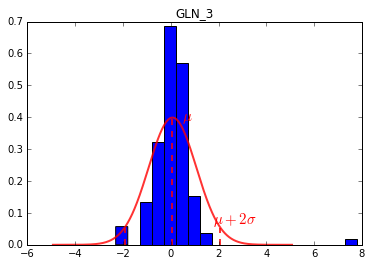

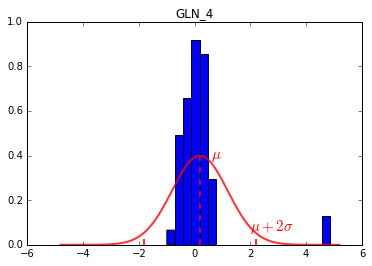

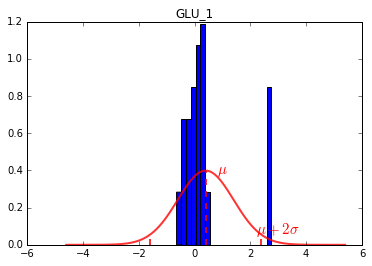

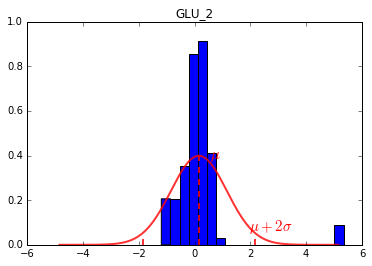

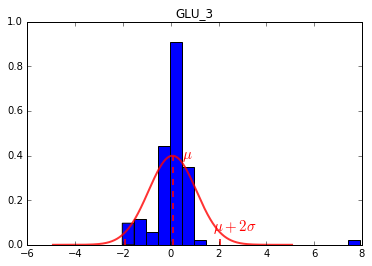

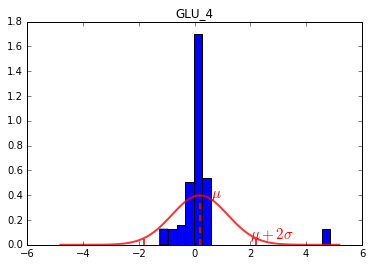

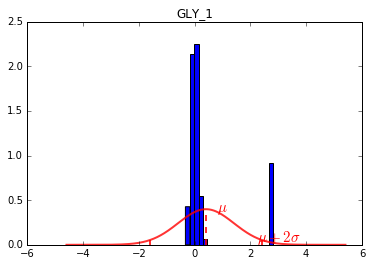

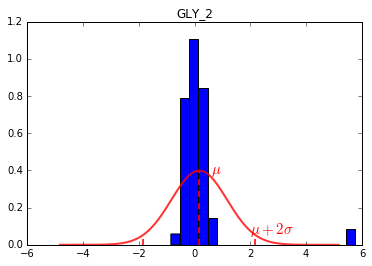

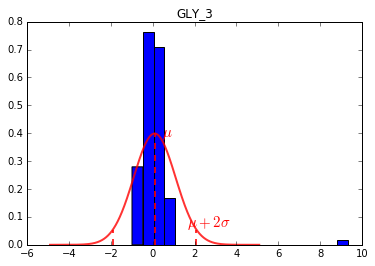

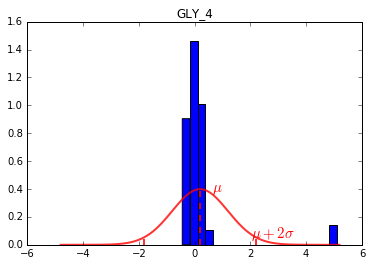

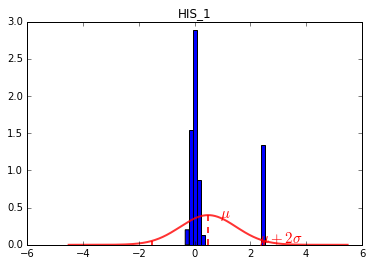

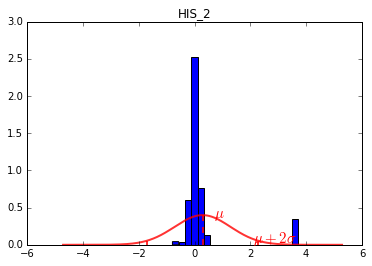

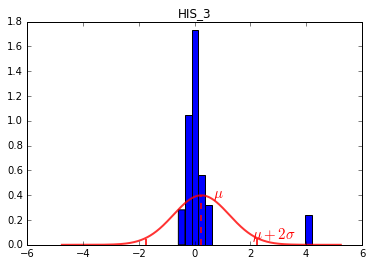

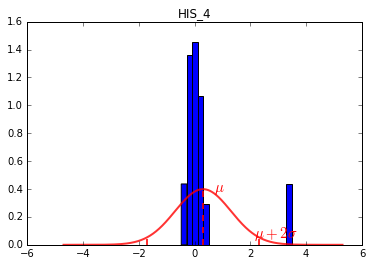

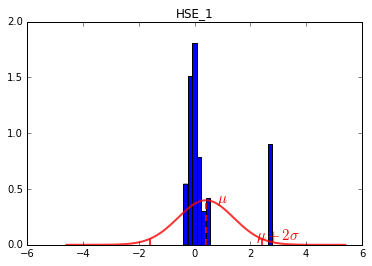

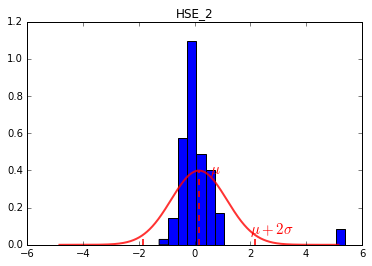

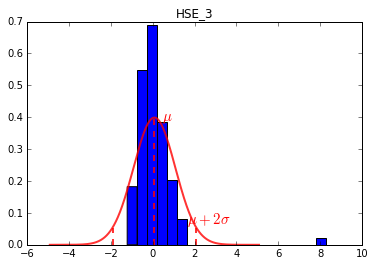

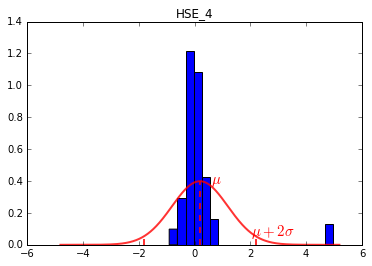

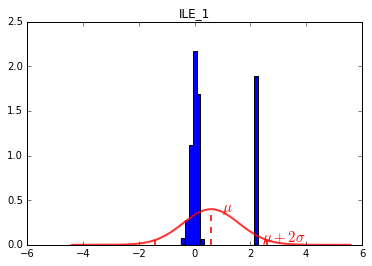

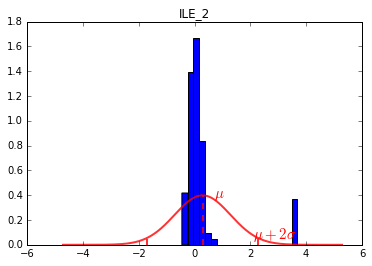

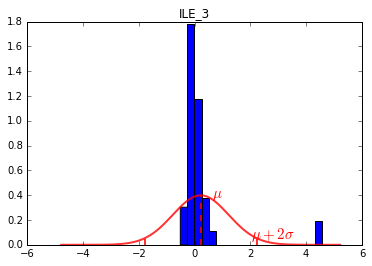

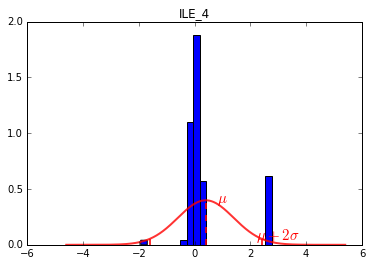

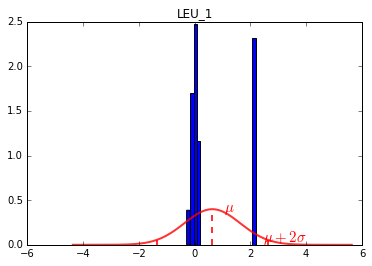

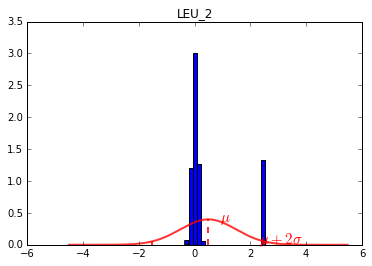

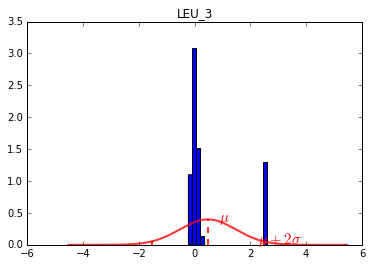

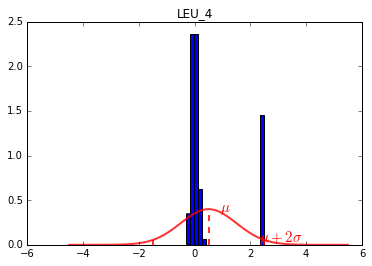

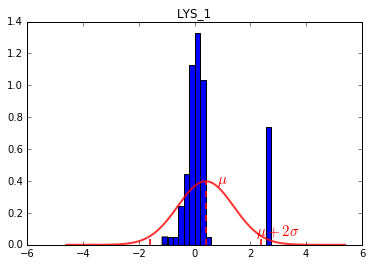

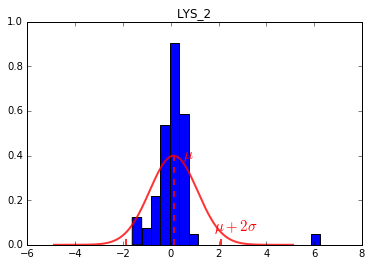

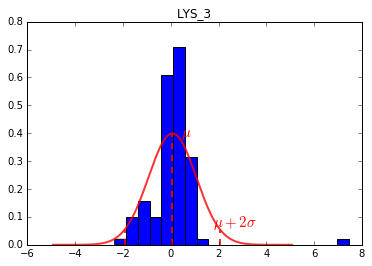

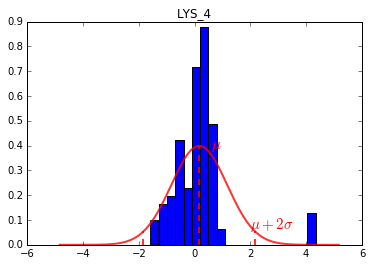

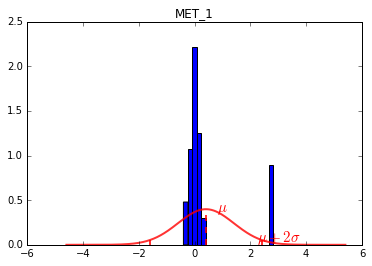

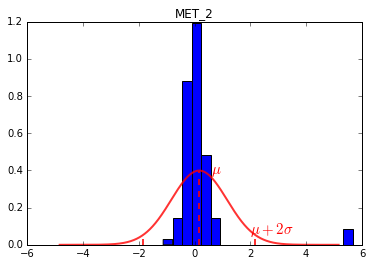

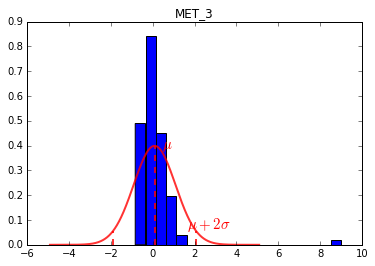

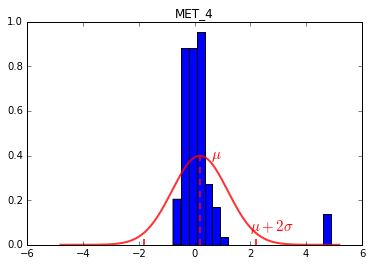

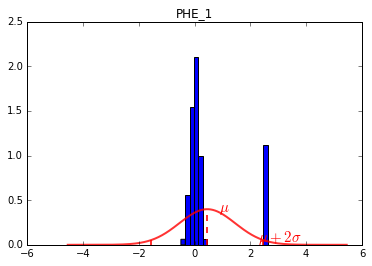

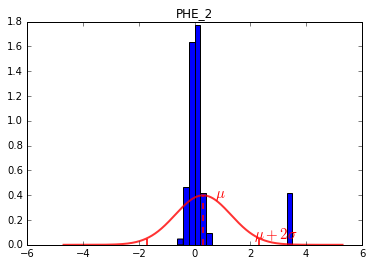

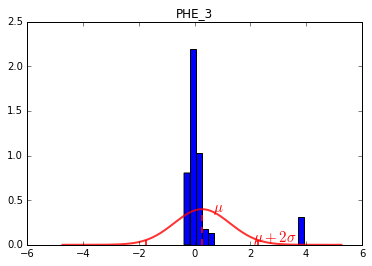

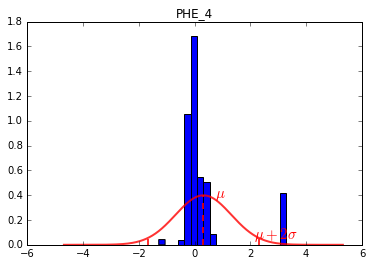

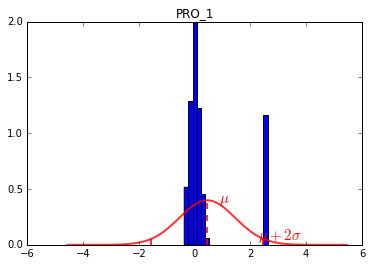

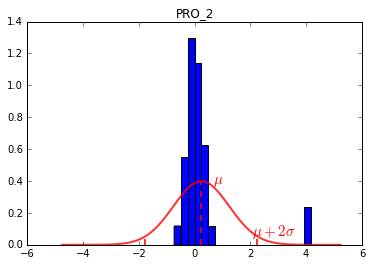

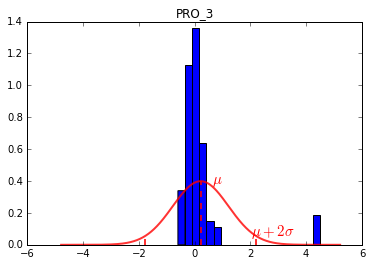

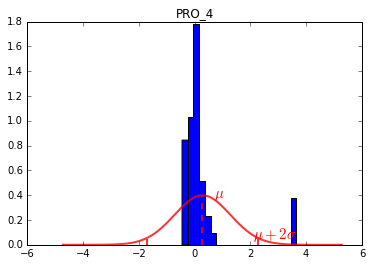

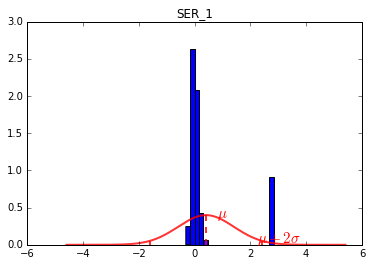

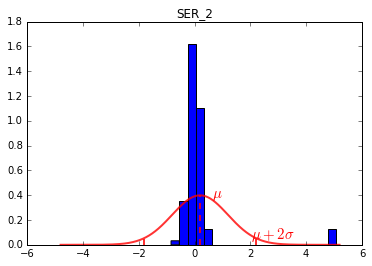

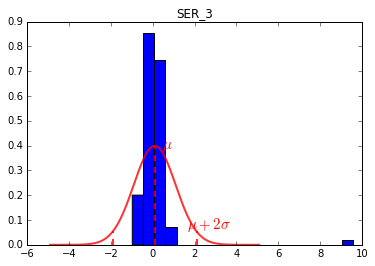

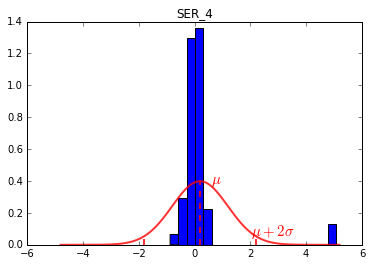

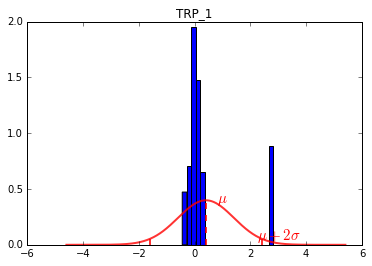

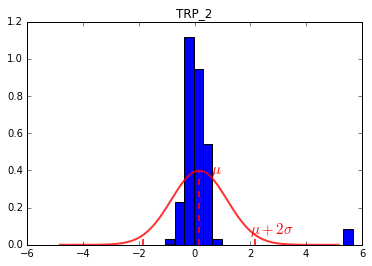

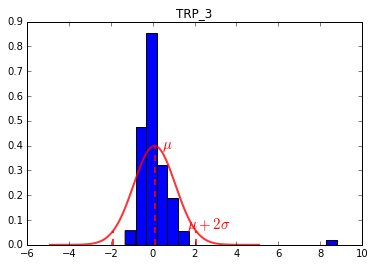

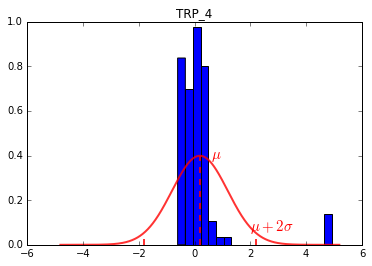

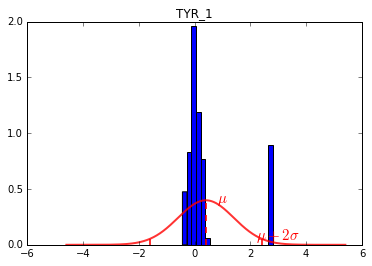

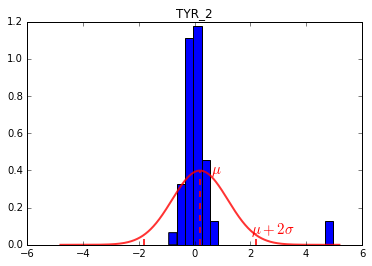

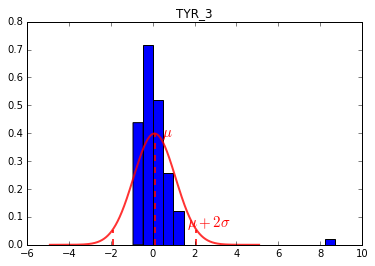

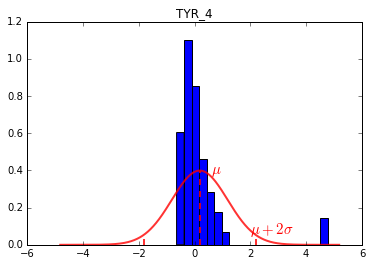

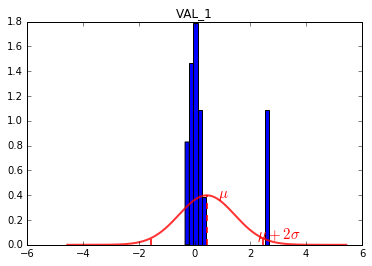

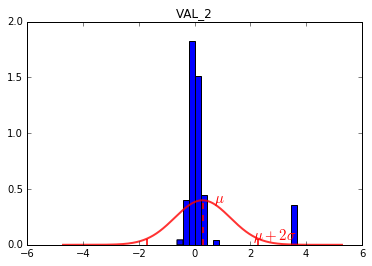

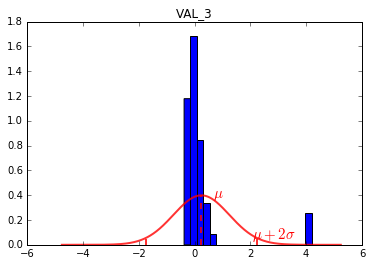

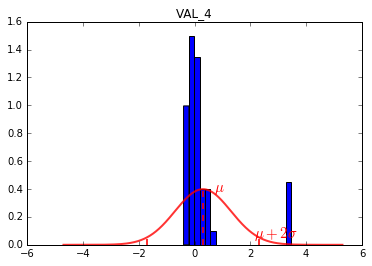

In [50]:
for ip, p_ID in enumerate(dataset.phenotype_ID[0:P_max]):
    pl.figure(figsize=[3,3])#create the figure
    
    #histogram of the untransformed phenotypes
    plot_normal(phenotype_vals.values[:,ip],alpha=0.8)
    pl.title("%s" % p_ID)

In [52]:
phenotype_vals_boxcox, maxlog = preprocess.boxcox(phenotype_vals.values)

In [53]:
phenotype_vals_ranks = preprocess.rankStandardizeNormal(phenotype_vals.values)

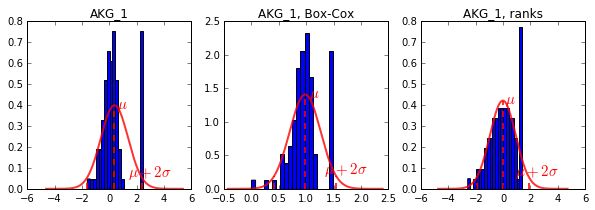

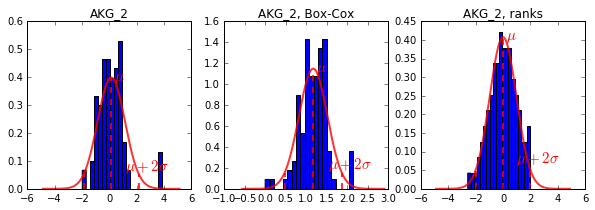

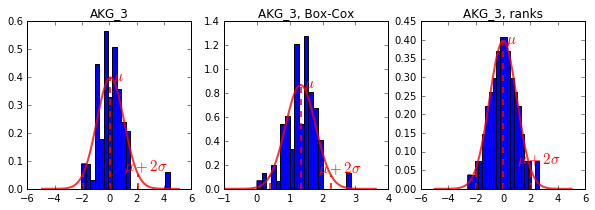

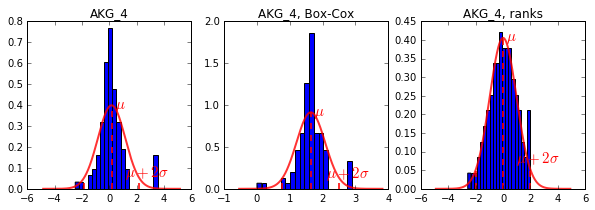

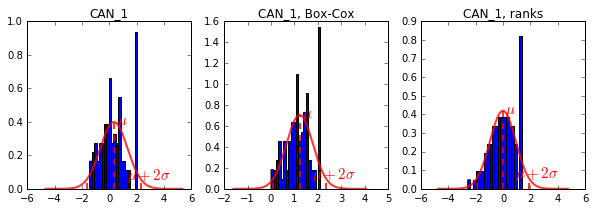

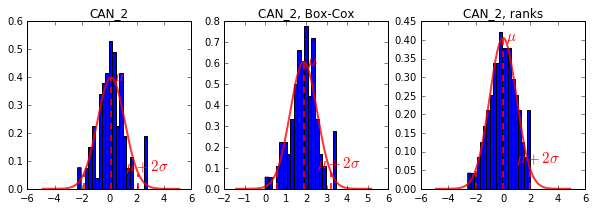

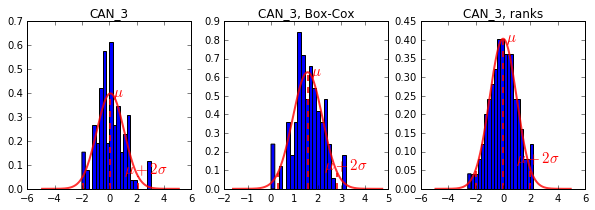

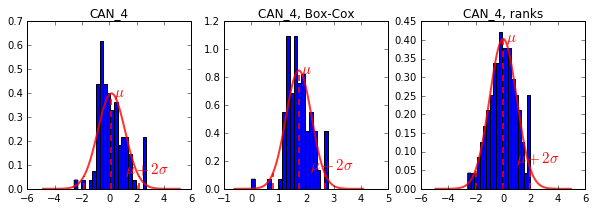

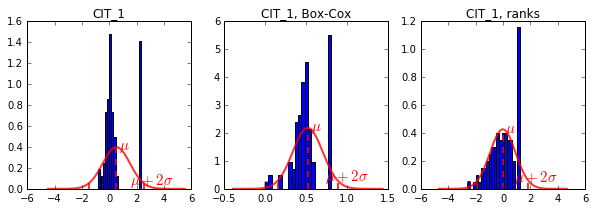

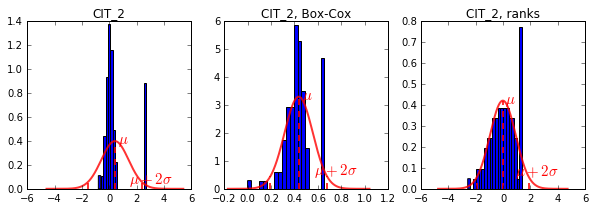

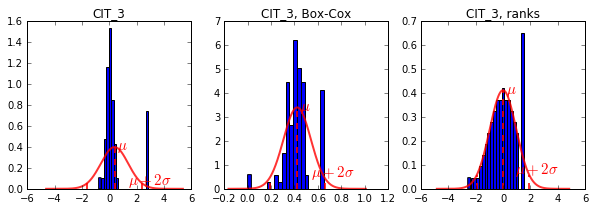

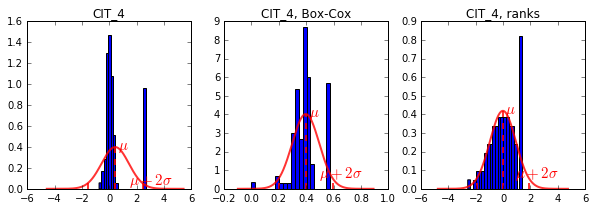

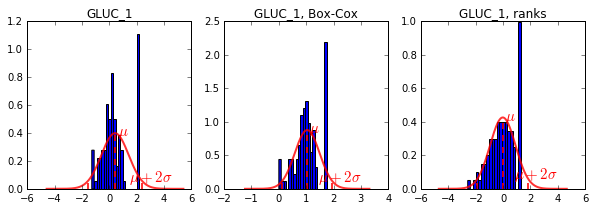

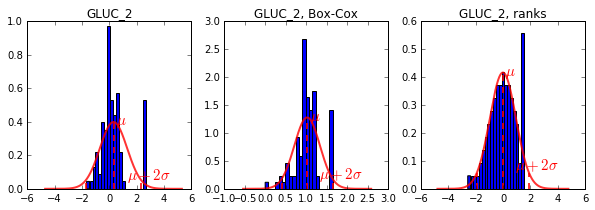

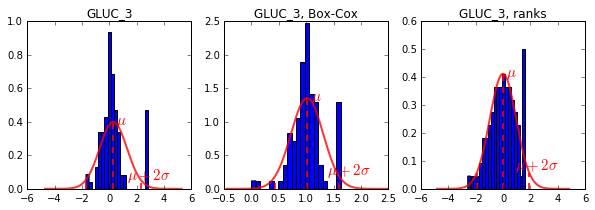

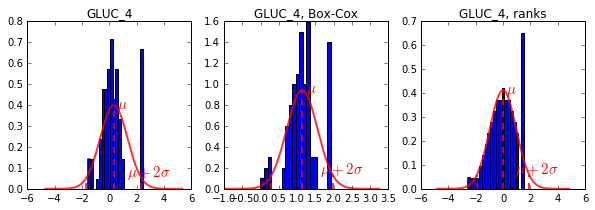

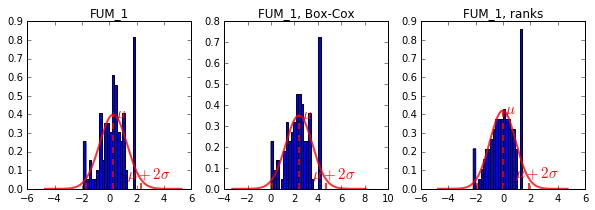

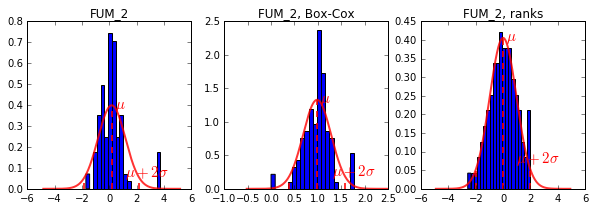

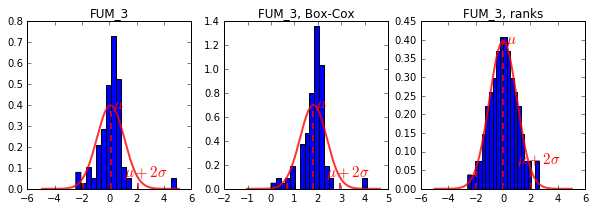

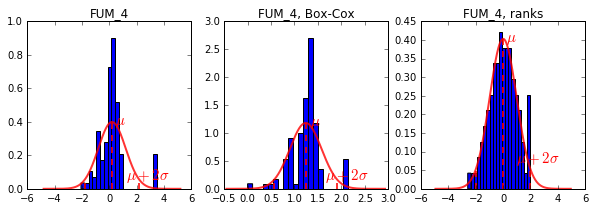

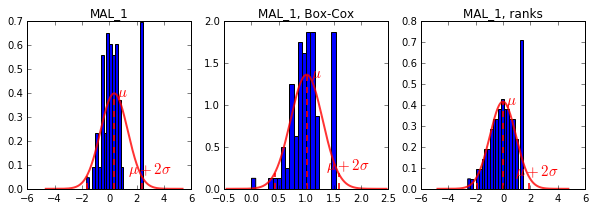

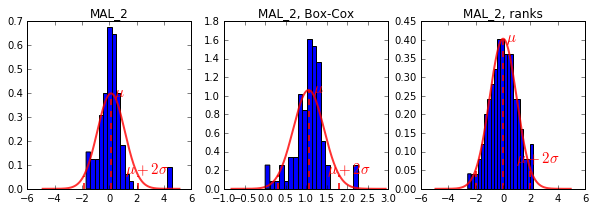

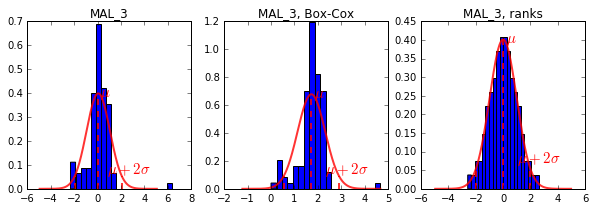

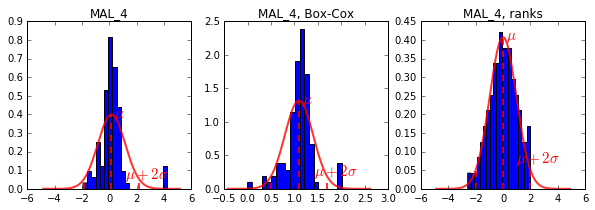

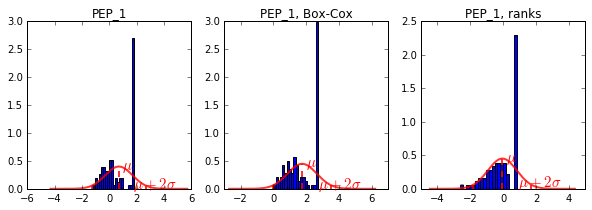

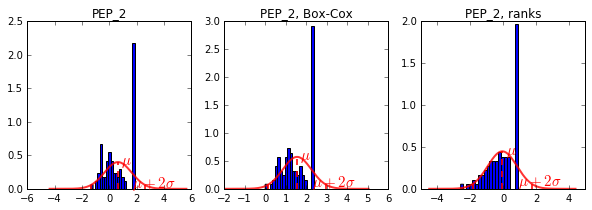

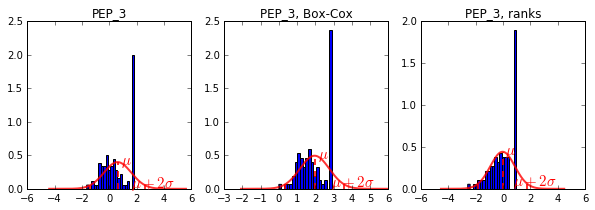

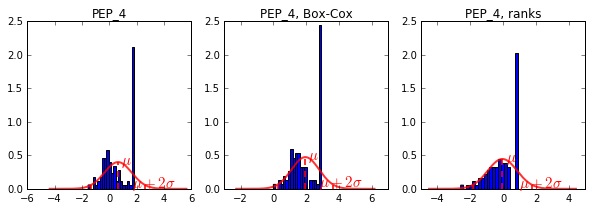

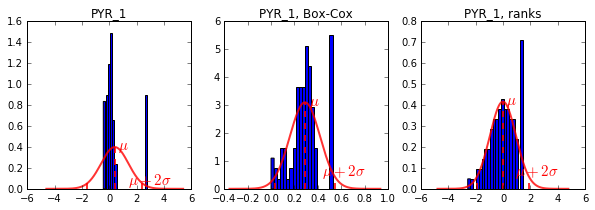

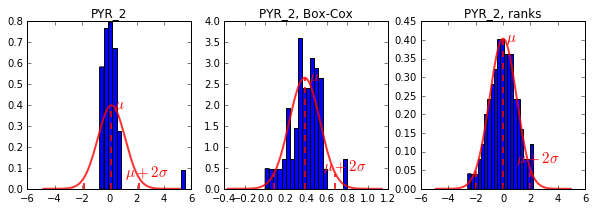

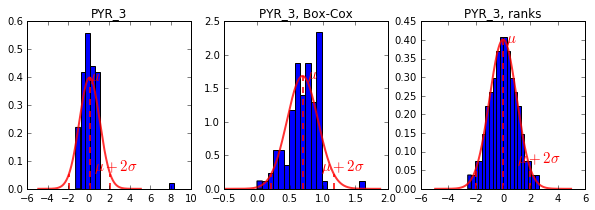

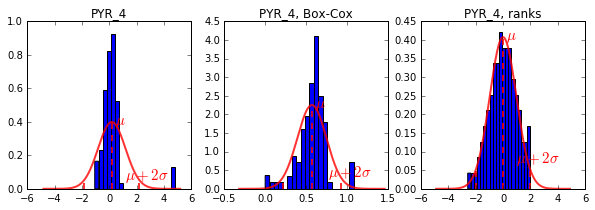

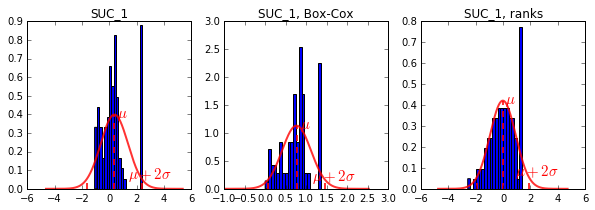

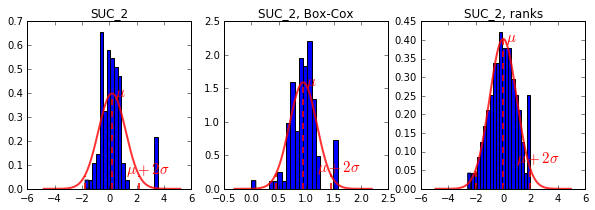

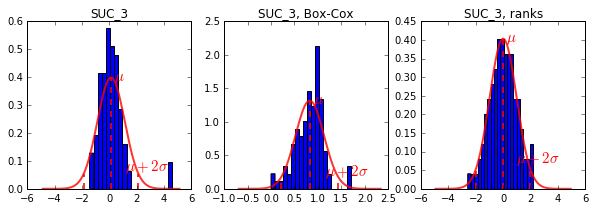

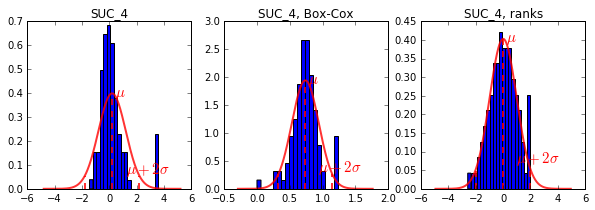

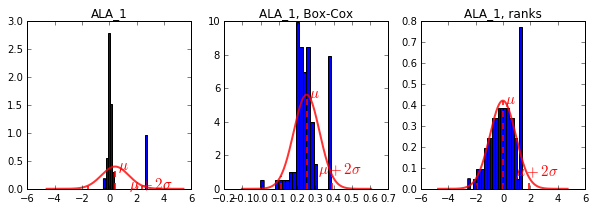

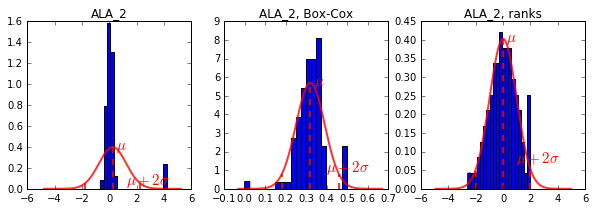

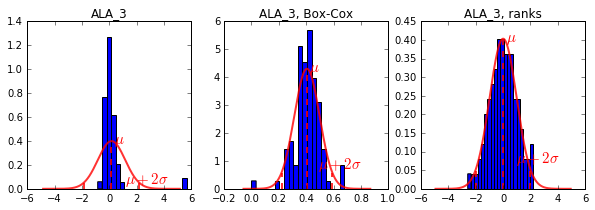

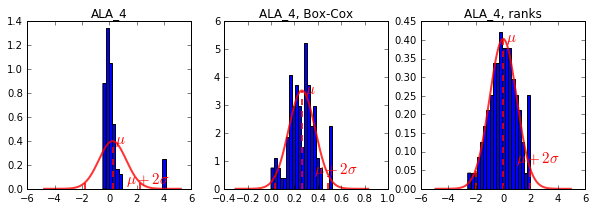

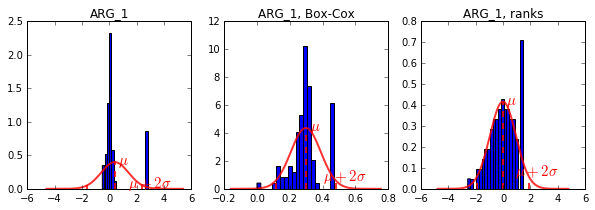

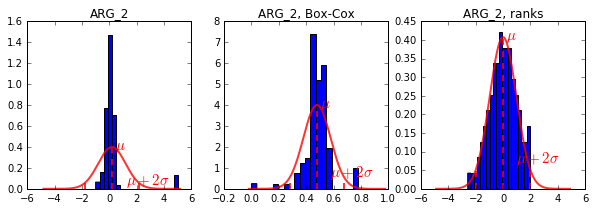

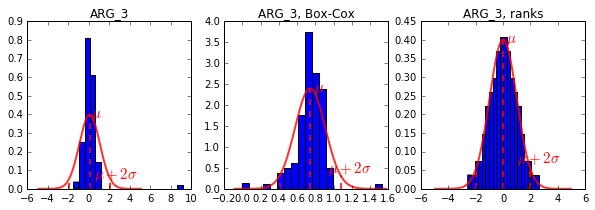

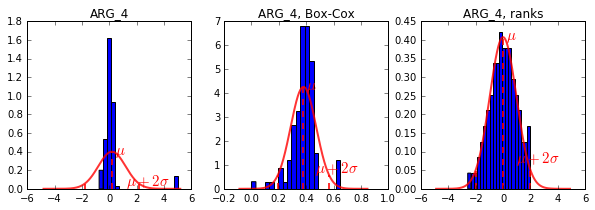

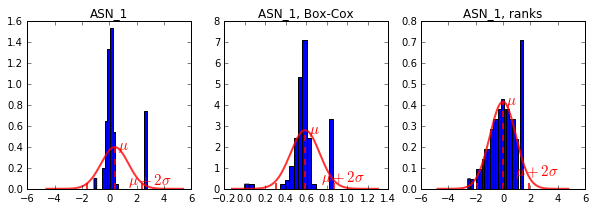

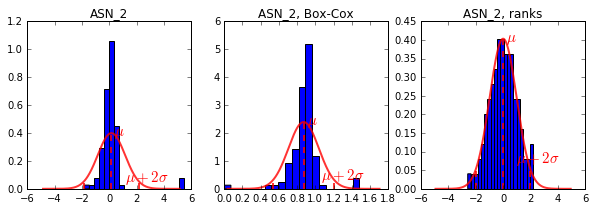

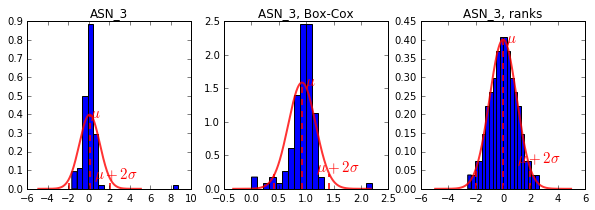

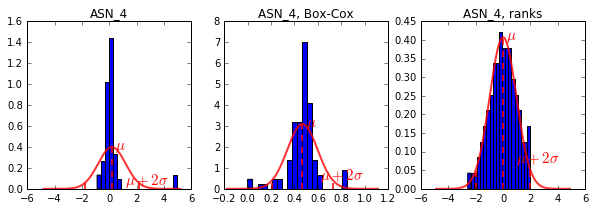

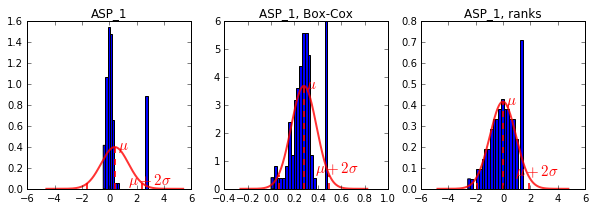

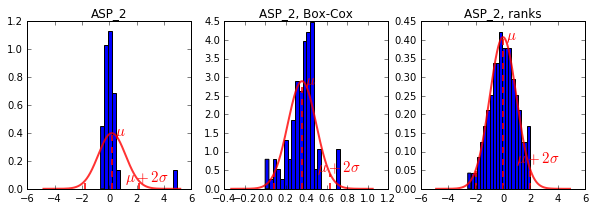

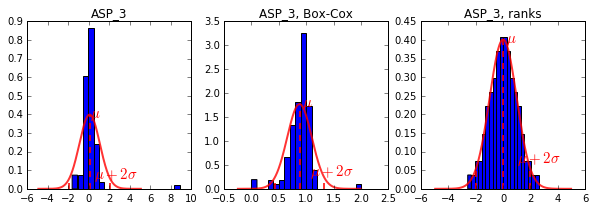

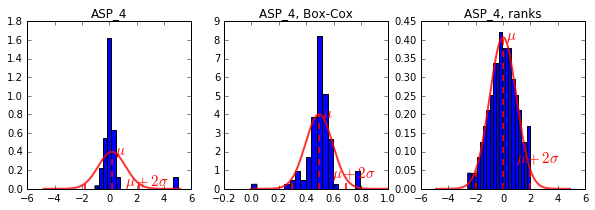

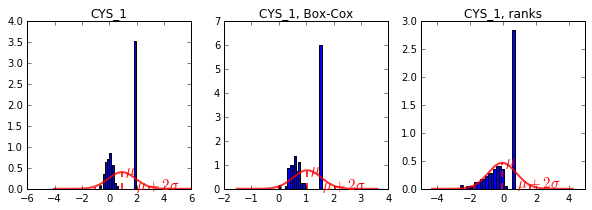

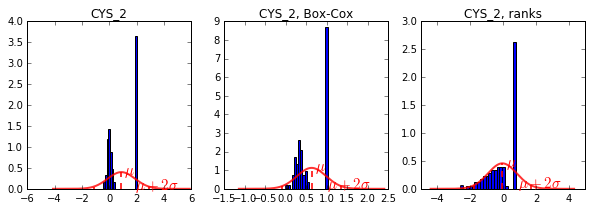

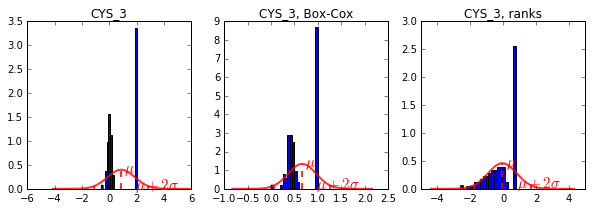

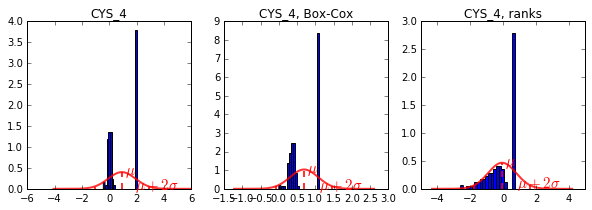

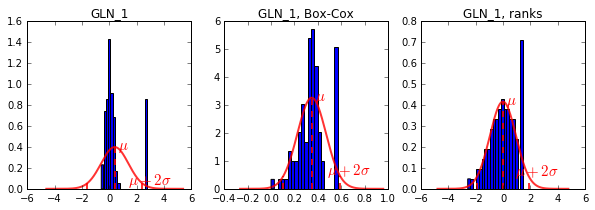

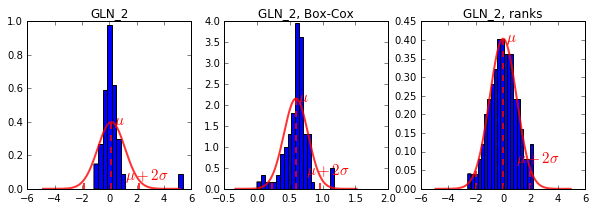

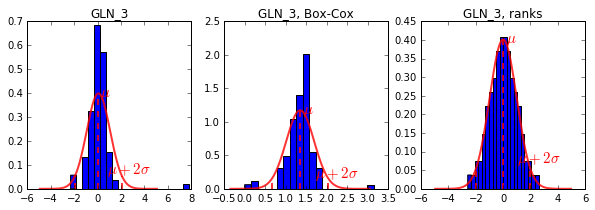

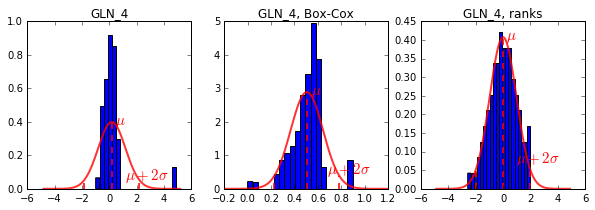

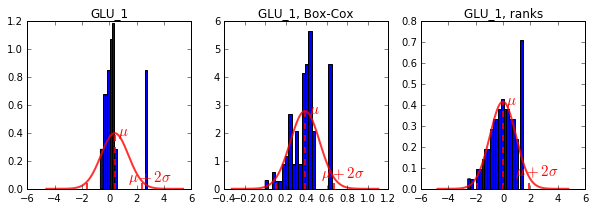

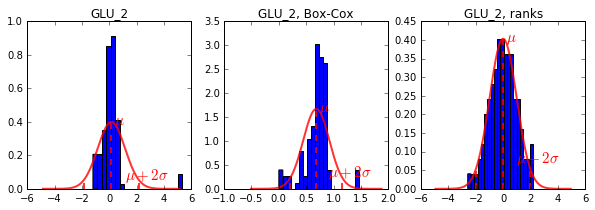

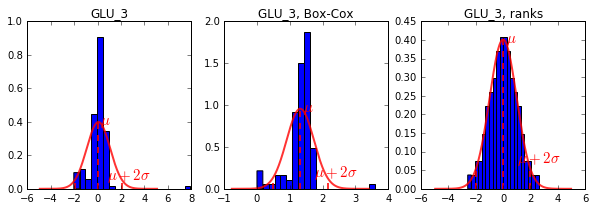

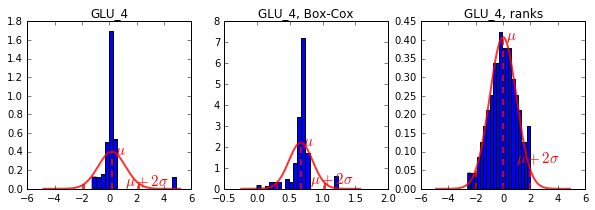

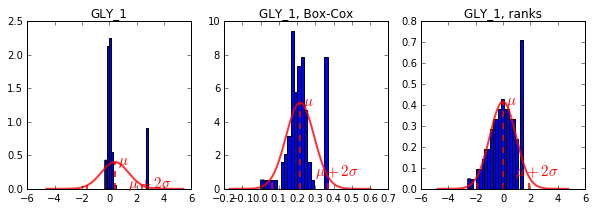

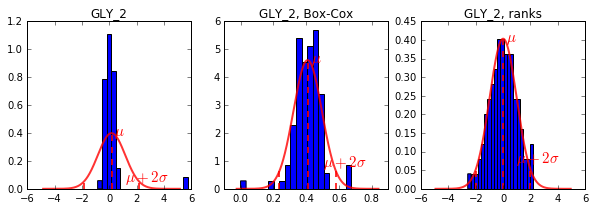

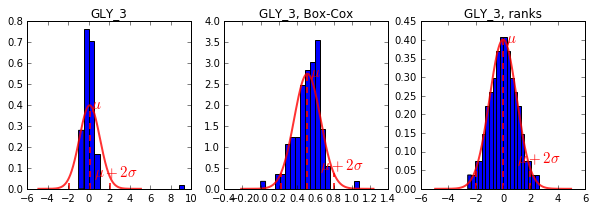

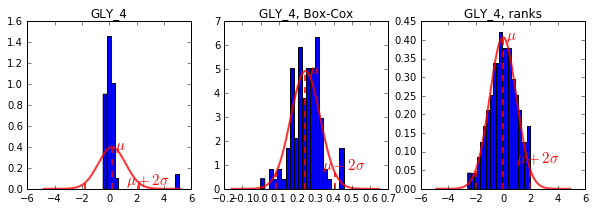

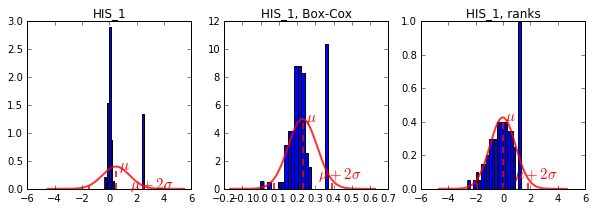

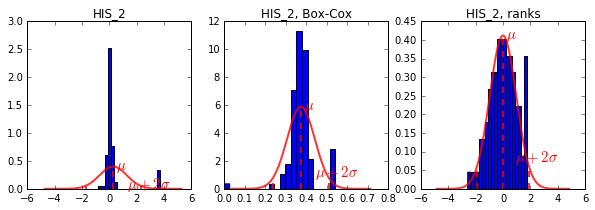

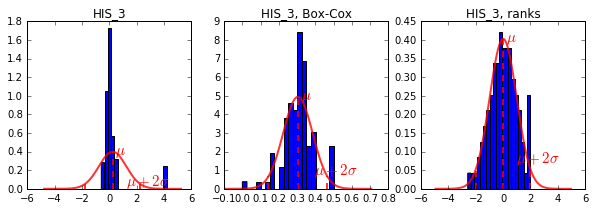

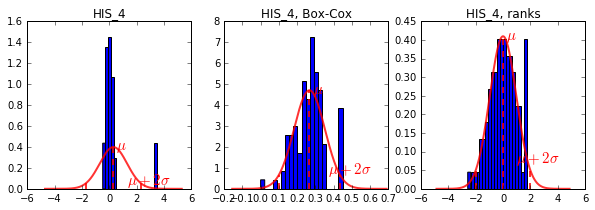

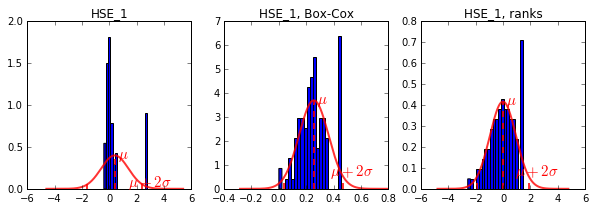

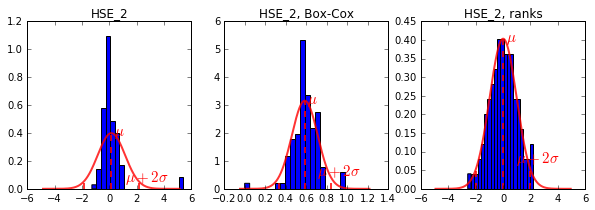

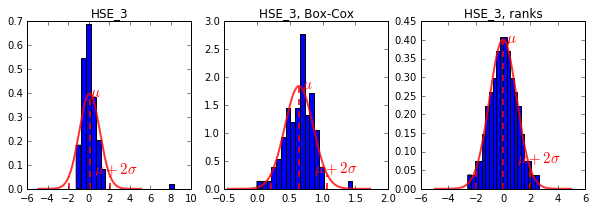

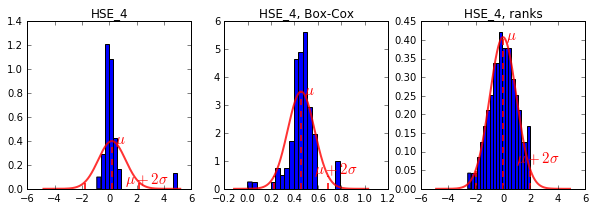

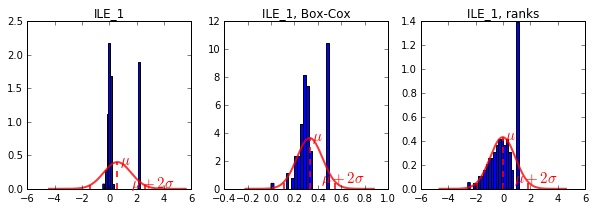

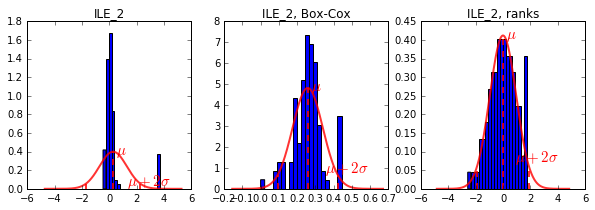

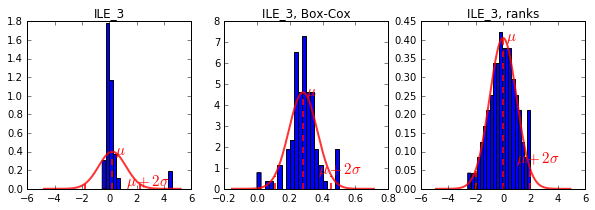

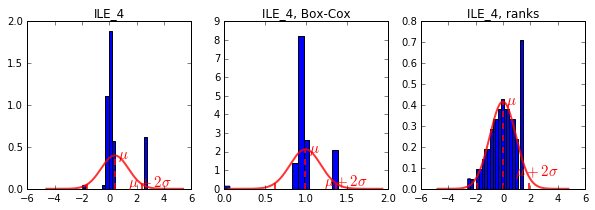

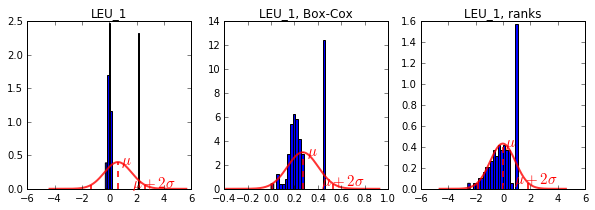

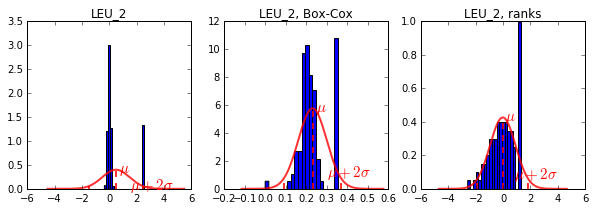

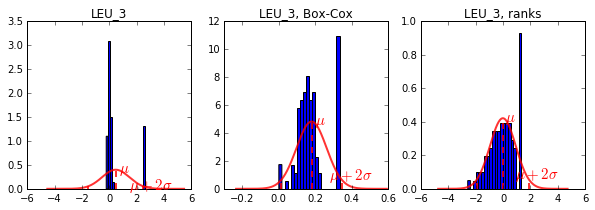

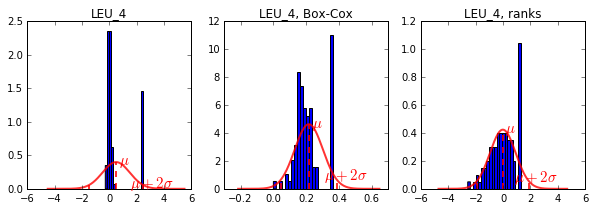

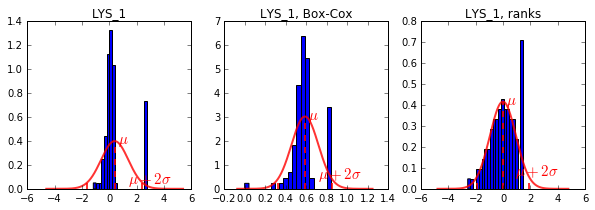

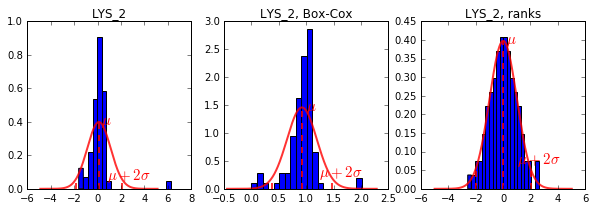

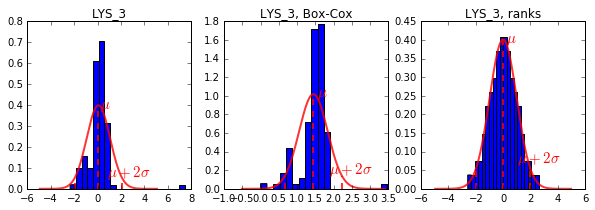

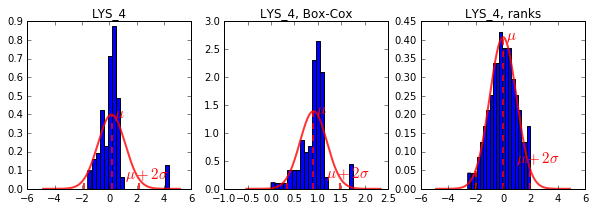

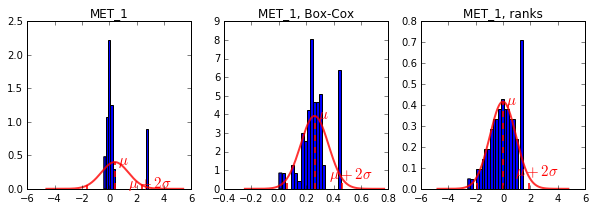

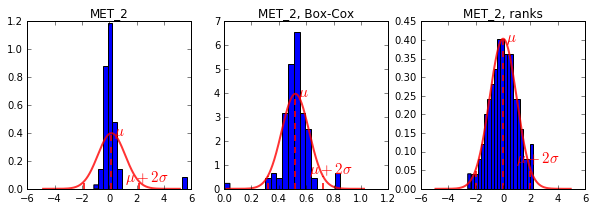

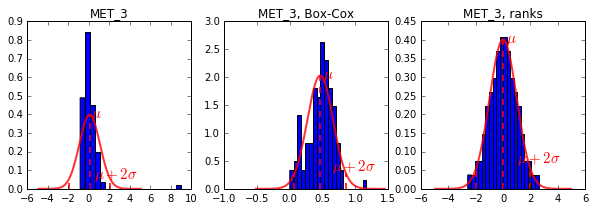

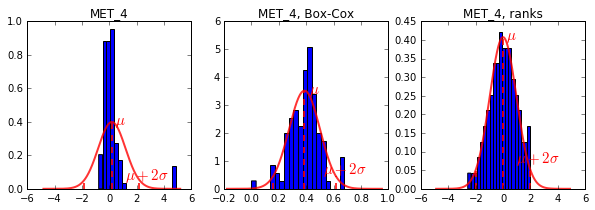

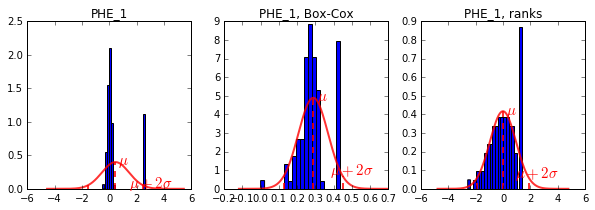

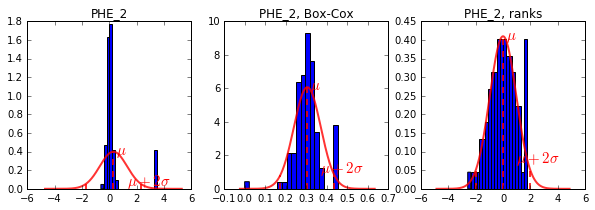

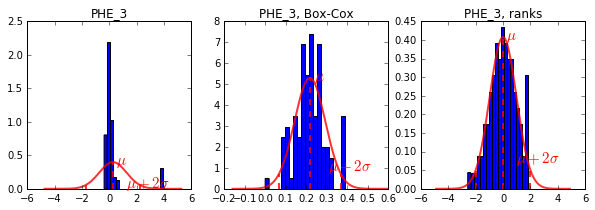

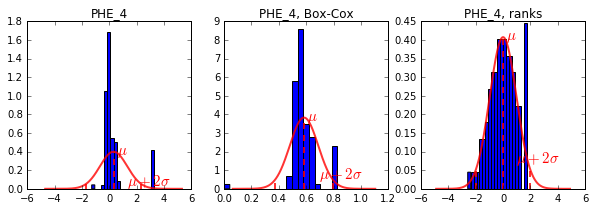

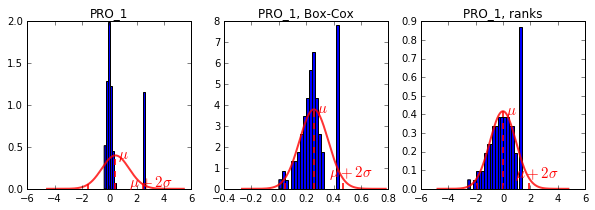

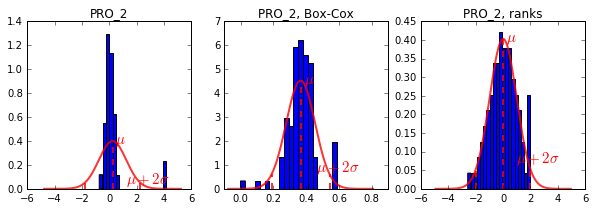

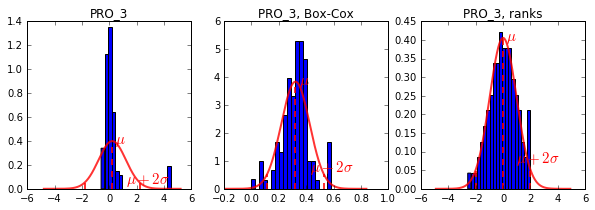

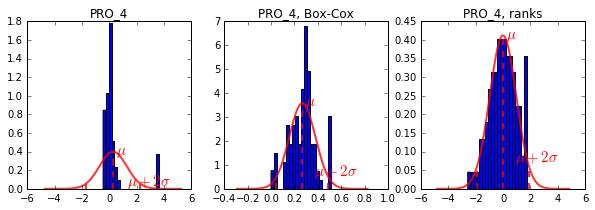

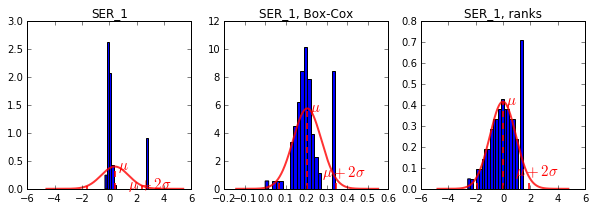

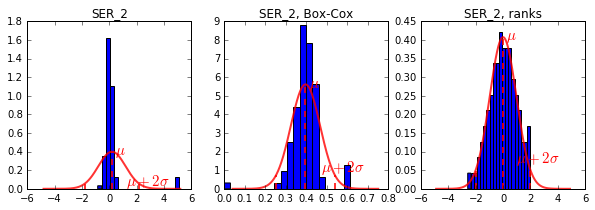

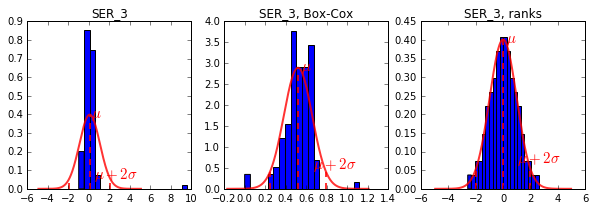

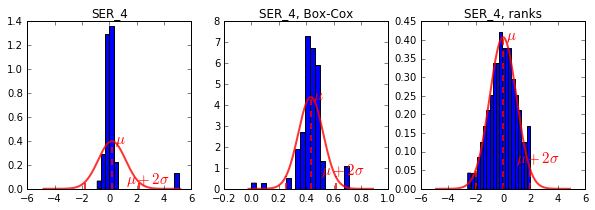

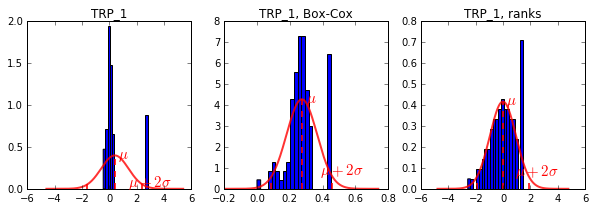

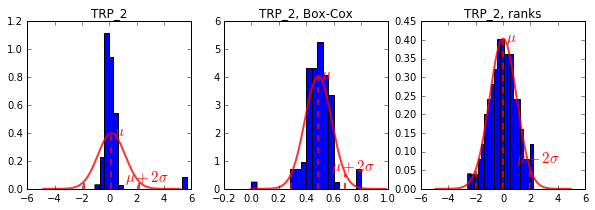

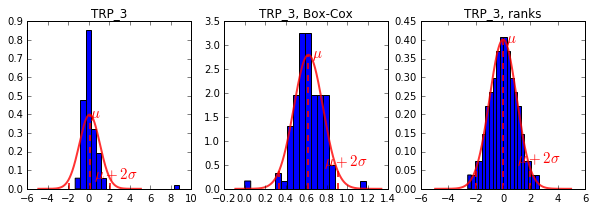

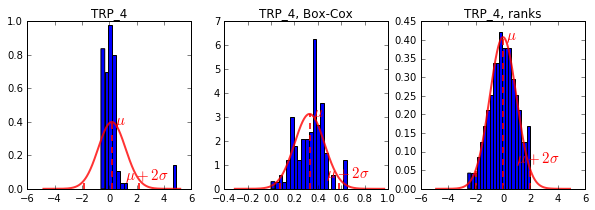

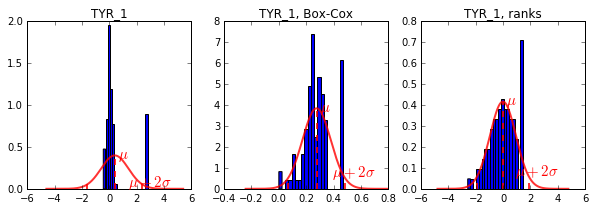

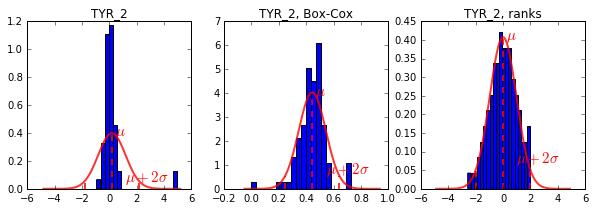

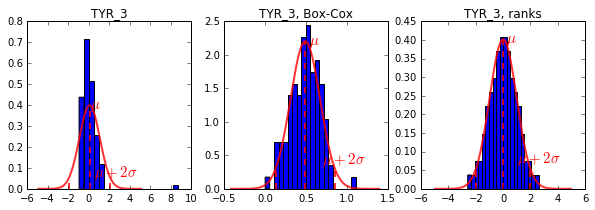

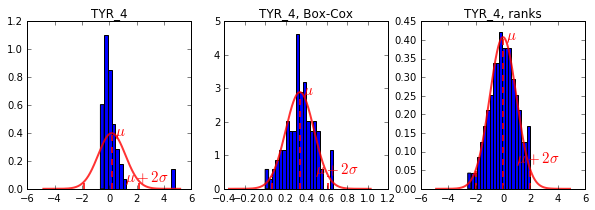

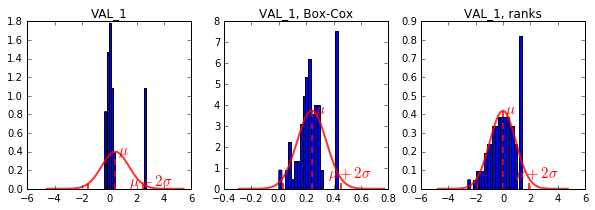

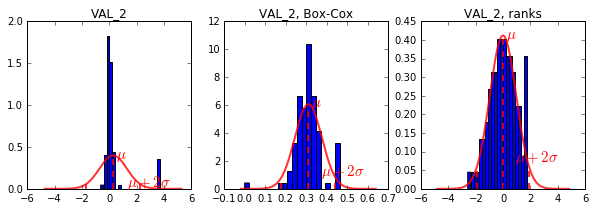

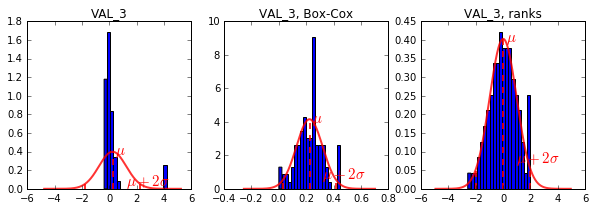

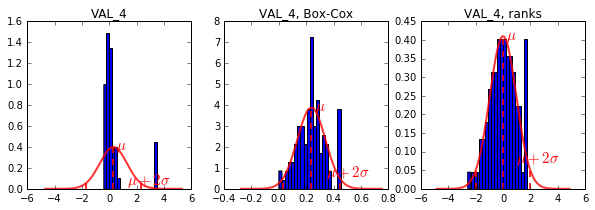

In [54]:
for ip, p_ID in enumerate(dataset.phenotype_ID[0:P_max]):
    pl.figure(figsize=[10,3])#create the figure
    
    plt = pl.subplot(1,3,1)#the untransformed phenotypes
    #histogram of the untransformed phenotypes
    plot_normal(phenotype_vals.values[:,ip],alpha=0.8,figure=plt)
    pl.title("%s" % p_ID)
    
    plt = pl.subplot(1,3,2)#the untransformed phenotypes
    #histogram of the untransformed phenotypes
    plot_normal(phenotype_vals_boxcox[:,ip],alpha=0.8,figure=plt)
    pl.title("%s, Box-Cox" % p_ID)
    
    plt = pl.subplot(1,3,3)#the rank transformed phenotypes
    #histogram of the untransformed phenotypes
    plot_normal(phenotype_vals_ranks[:,ip],alpha=0.8,figure=plt)
    pl.title("%s, ranks" % p_ID)

### Original Phenotype Values

In [26]:
#run linear regression on each SNP
lm = qtl.test_lm(snps=snps[sample_idx],pheno=phenotype_vals.values)

#convert P-values to a DataFrame for nice output writing:
pvalues_lm = pd.DataFrame(data=lm.pvalues.T,index=dataset.geno_ID,
                       columns=phenotype_ID)

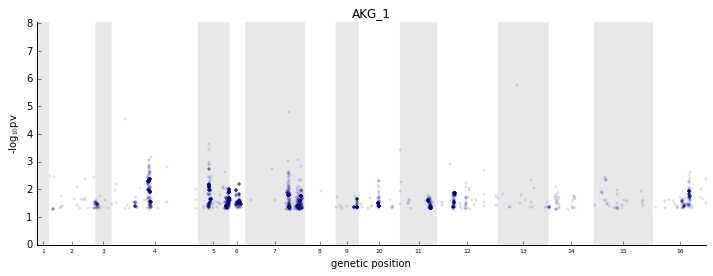

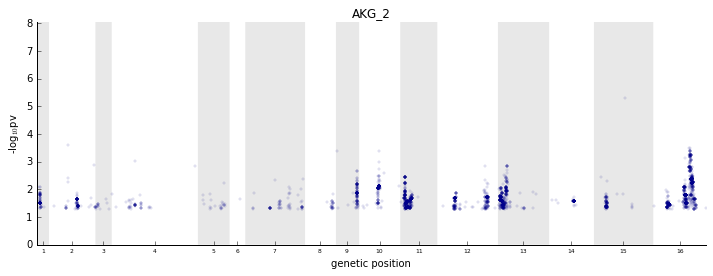

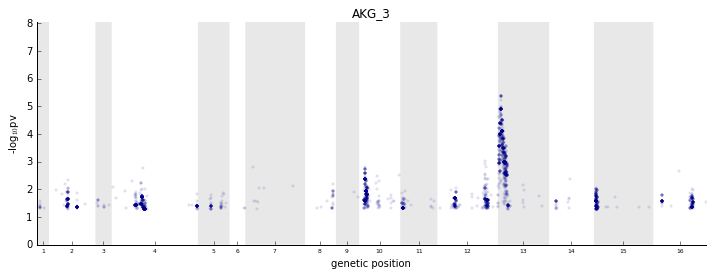

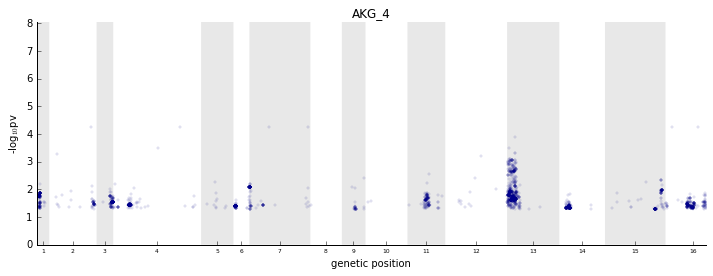

In [27]:
# Genome-wide manhatton plots for one phenotype:
for ip, p_ID in enumerate(dataset.phenotype_ID[0:P_max]):
    pl.figure(figsize=[12,4])
    plot_manhattan(posCum=position['pos_cum'],pv=pvalues_lm[p_ID].values,chromBounds=chromBounds,thr_plotting=0.05)
    pl.title(p_ID)

### Rank Phenotype Values

In [31]:
#run linear regression on each SNP
lm = qtl.test_lm(snps=snps[sample_idx],pheno=phenotype_vals_ranks)

#convert P-values to a DataFrame for nice output writing:
pvalues_lm = pd.DataFrame(data=lm.pvalues.T,index=dataset.geno_ID,
                       columns=phenotype_ID)

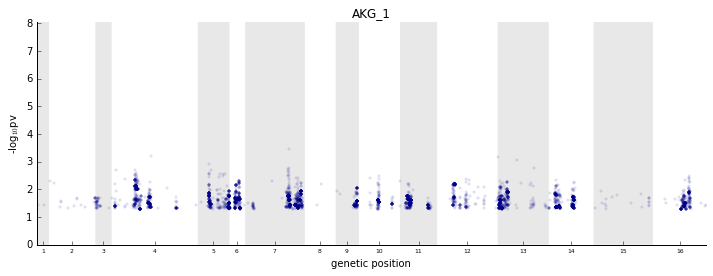

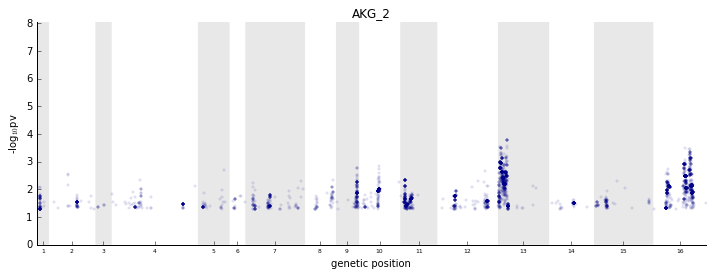

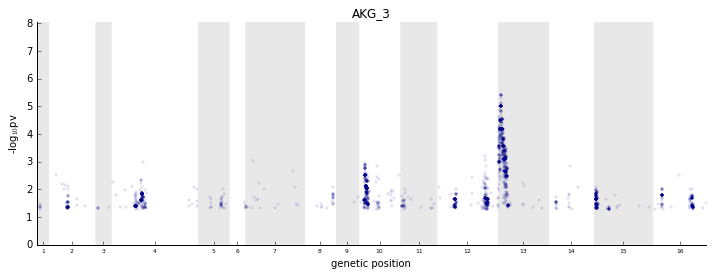

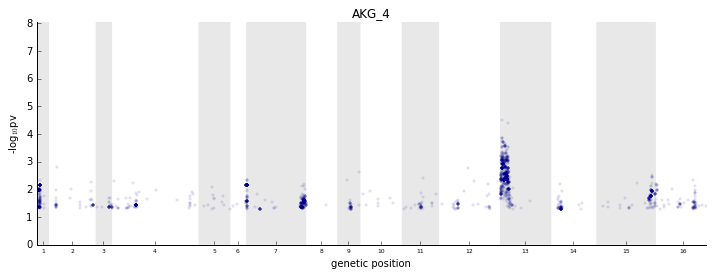

In [32]:
# Genome-wide manhatton plots for one phenotype:
for ip, p_ID in enumerate(dataset.phenotype_ID[0:P_max]):
    pl.figure(figsize=[12,4])
    plot_manhattan(posCum=position['pos_cum'],pv=pvalues_lm[p_ID].values,chromBounds=chromBounds,thr_plotting=0.05)
    pl.title(p_ID)